## Reading the data

In [7]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt

df_bal = pd.read_csv("../../corpus_sprint2_imbalanced_cp.csv", encoding="utf-8")
df = df_bal["Consumer complaint narrative"]
df = df.dropna()

model = Doc2Vec.load("../../model_doc2vec_imbalanced_20epochs")

## Applying k-means

In [2]:
vectors = model.docvecs.vectors_docs

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics

### Visual with elbow

1
2
3
4
5
6
7
8
9


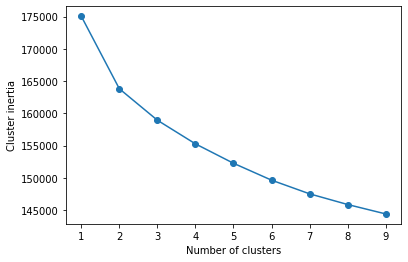

In [9]:
inertia = []
k_min=1
k_max=10
for i in range(k_min, k_max):
    print(i)
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(vectors)
    inertia.append(km.inertia_)

plt.plot(range(k_min,k_max), inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia')
plt.show()

### Automatic with silhouette

In [4]:
sil_max = -99999
opt_k = 0
k_min=2
k_max=6

for i in range(k_min, k_max):
    print(i)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(vectors)
    
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    print("Train done")
    silhouette_score = metrics.silhouette_score(vectors, labels, metric='euclidean')
    print("Silhouette done")
    print(silhouette_score)
    if(sil_max < silhouette_score):
        sil_max = silhouette_score
        opt_k = i
kmeans = KMeans(n_clusters=opt_k)
kmeans.fit(vectors) 

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(vectors))
 
silhouette_score = metrics.silhouette_score(vectors, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

2
Train done
Silhouette done
0.06549683
3
Train done
Silhouette done
0.0445493
4
Train done
Silhouette done
0.046159357
5
Train done
Silhouette done
0.03588252
Cluster id labels for inputted data
[0 1 0 ... 1 0 1]
Centroids data
[[-0.09357107  0.02486059 -0.05005679 -0.04017566  0.03453628  0.10651062
   0.00578245 -0.06224272  0.01419877 -0.07631929  0.02667292 -0.09208676
  -0.01187228  0.1281761   0.06549064 -0.00957657  0.04737936 -0.00479055
  -0.08753236  0.04737681 -0.02967806 -0.18158102 -0.00334482  0.10681926
  -0.00529356 -0.25754026 -0.1660991  -0.00798009  0.06895541 -0.02124416
   0.00028327 -0.04685924 -0.03357963  0.01456523  0.13224563 -0.21057703
  -0.19974904 -0.01038884 -0.03324467 -0.01415027 -0.07664019 -0.11453372
  -0.2324398  -0.09742258 -0.01828411 -0.00983332 -0.04058218  0.09161721
  -0.04401312 -0.07456931]
 [ 0.02808622  0.02507518 -0.10115371 -0.2049875   0.0413172  -0.07291754
   0.01930008 -0.11688468 -0.03736746 -0.08369245  0.0214085  -0.13070168
  -0

## Plotting the classes

In [5]:
df_clustered = pd.concat([df, pd.DataFrame(labels, columns=["clust"])], axis = 1)
df_clustered = df_clustered.dropna()

                             Consumer complaint narrative  clust
0       they would not let me pay my loan off 2 days b...      0
1       service finance are liars and are charging me ...      1
2       on xx/xx/ i signed a car loan agreement to fin...      0
3       we hired and debt collection to handle collect...      1
4       i borrowed 200.00 in an financial emergency fr...      1
...                                                   ...    ...
111629  wells fargo bank is refusing to honor a check ...      1
111630  i was charged a monthly maintenance fee on an ...      1
111631  paypal.com signed me up for a " paypal credit ...      1
111632  nfcu was contacted about a dispute i had with ...      0
111633  safe deposit box of . bank account transferred...      1

[111634 rows x 2 columns]


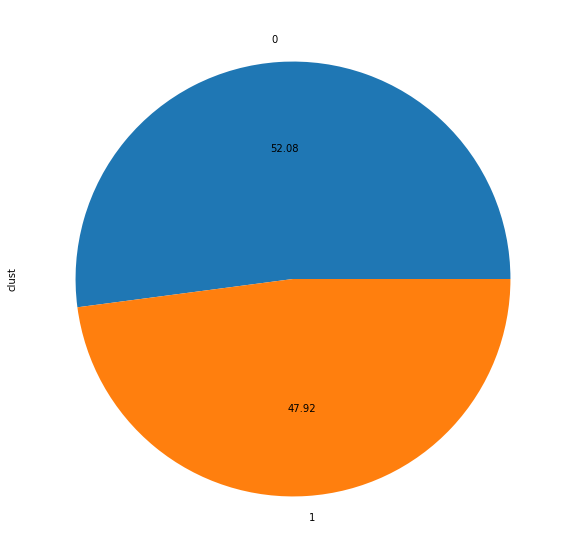

In [6]:
print(df_clustered)

df_clustered.groupby("clust")["clust"].count().plot(kind = "pie", autopct='%.2f', figsize = (10, 10))